## Problem Statement

- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). 


- A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 


- The prediction task is to determine whether a person makes over $50K a  year.


In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_csv("cen.csv")

In [7]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Problem Type

Conclusions after understanding the data set:-

- 1) The target variable is Income


- 2) The target variable is categorical in nature


- 3) Solving it as a Classification Problem


- 4) The aim is to predict weather a certain individual earns more that 50k or less than 50k a year

## Checking the data types

In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## Data types include:

- Object
- Int

### Lets check for duplicate values

In [10]:
df.duplicated().sum()

24

### Some duplicates in the dataset

In [11]:
df = pd.DataFrame.drop_duplicates(df)

In [12]:
df.duplicated().sum()

0

### No more duplicated data

### Lets check for missing values

In [13]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Luckly no missing values in the dataset

<AxesSubplot:>

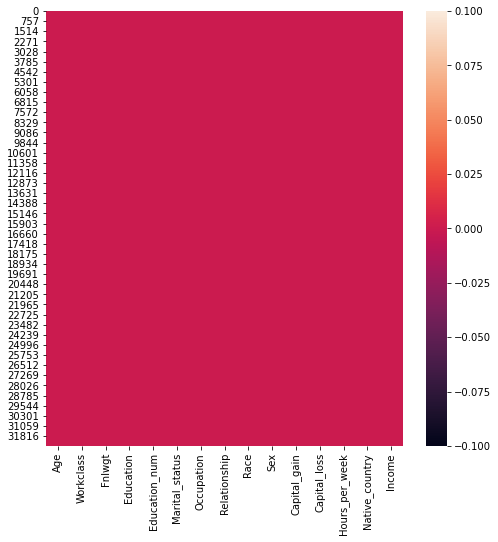

In [14]:
# Visualizing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

### Data Shape

In [15]:
df.shape

(32536, 15)

Rows : 32536

Columns : 15

#### Data Descriptiion

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


#### Some overview of data:

- 1) Age range of an individual lies between 17y to 90y


- 2) The final weights are in a range (12285 , 1484705)


- 3) Education number lies betwwen 1 to max 16 


- 4) Maximum capital gain is 99999


- 5) Maximum capital loss is 4356


- 6) Maximum hours per week are 99

Lets check out the person with the highest age

In [17]:
df[df["Age"] == 90]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
221,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
1039,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1934,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
2302,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
2890,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K
4069,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
4108,90,?,256514,Bachelors,13,Widowed,?,Other-relative,White,Female,991,0,10,United-States,<=50K
5271,90,Private,141758,9th,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5369,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
5405,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K


Observations from the table:

- There are total 42 individuals who are 90 years old


- Most of this individuals are having a yearly income of less then 50 K

#### Column names

In [18]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Data Cleaning

we can clearly observe that there are a lot of "?" entries in the data set we need to replace them with Nan

In [19]:
df = df.replace(" ?",np.nan)

In [20]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

### Now we have missing values in 3 columns:

- Workclass

- Occupation 

- Native_country 

In [21]:
df["Workclass"].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [22]:
df["Native_country"].mode()

0     United-States
dtype: object

Replacing the missing values in Workclass, Occupation and Native Country with Mode of data

In [23]:
df["Workclass"] = df["Workclass"].replace(np.nan," Private")

In [24]:
df["Workclass"].isnull().sum()

0

In [25]:
df["Occupation"] = df["Occupation"].replace(np.nan," Prof-specialty")

In [26]:
df["Occupation"].isnull().sum()

0

In [27]:
df["Native_country"] = df["Native_country"].replace(np.nan," United-States")

In [28]:
df["Native_country"].isnull().sum()

0

No More missing values in data

In [29]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [30]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA

In [31]:
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='Age', ylabel='Count'>

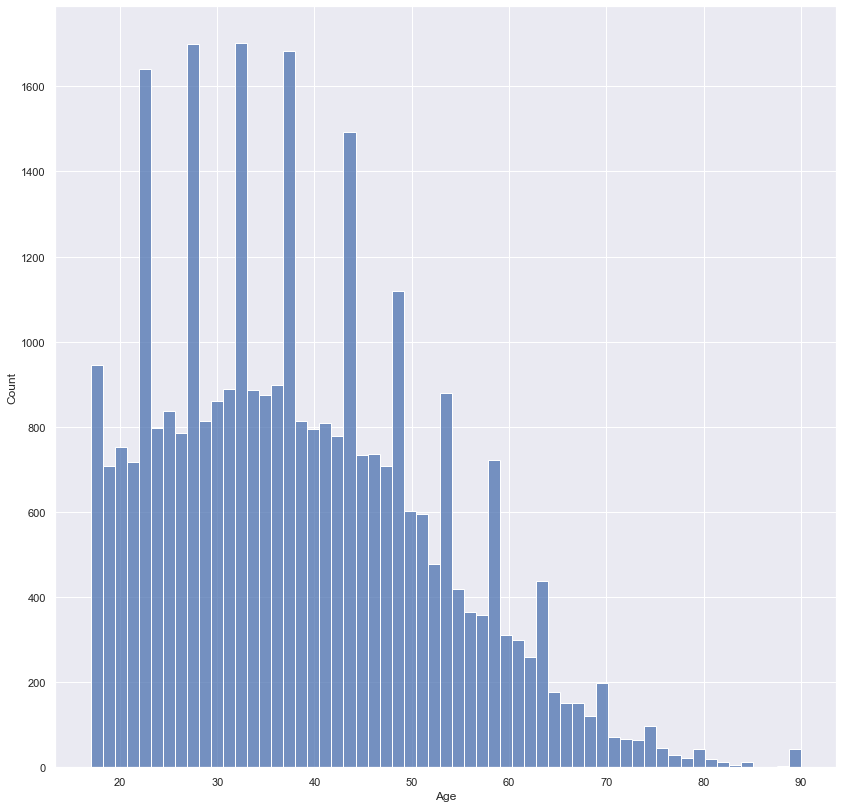

In [32]:
#Univariate
plt.figure(figsize=(14,14))
sns.histplot(x="Age",data=df)

Observations from the plot:

Most of the age range is between 18 to 50

After the age of 60, there is a decline (maybe due to Death rate)

There are very few people in the age range (60 - 90)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Count'>

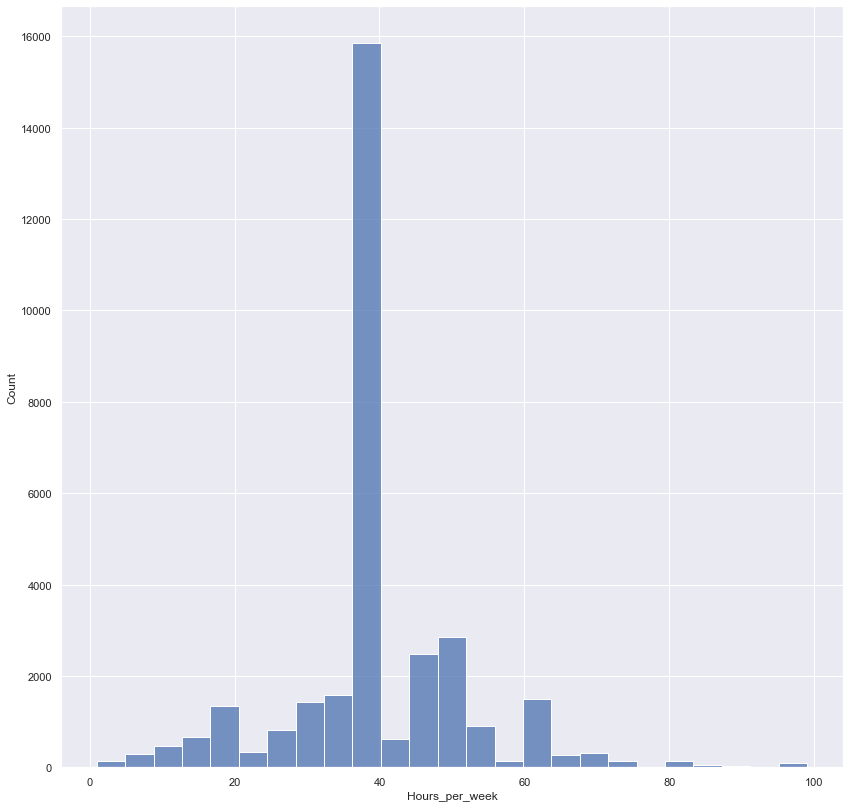

In [33]:
#Univariate
plt.figure(figsize=(14,14))
sns.histplot(x="Hours_per_week",data=df,bins=25)

Observations from the plot:

Most of the people are working 40 hrs a week

Very few people are working more than 60 hours a week

Some people are working less than 20 hrs a week (maybe they are students who are working part-time)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

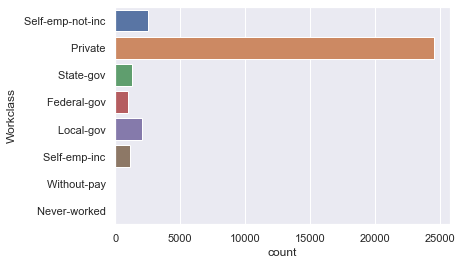

In [34]:
sns.countplot(y="Workclass",data=df)

Observations from above plot:

Most of the employees work for the Private sector

Very few people work in the Fedral government sector

Some of the people have never worked

<AxesSubplot:xlabel='count', ylabel='Education'>

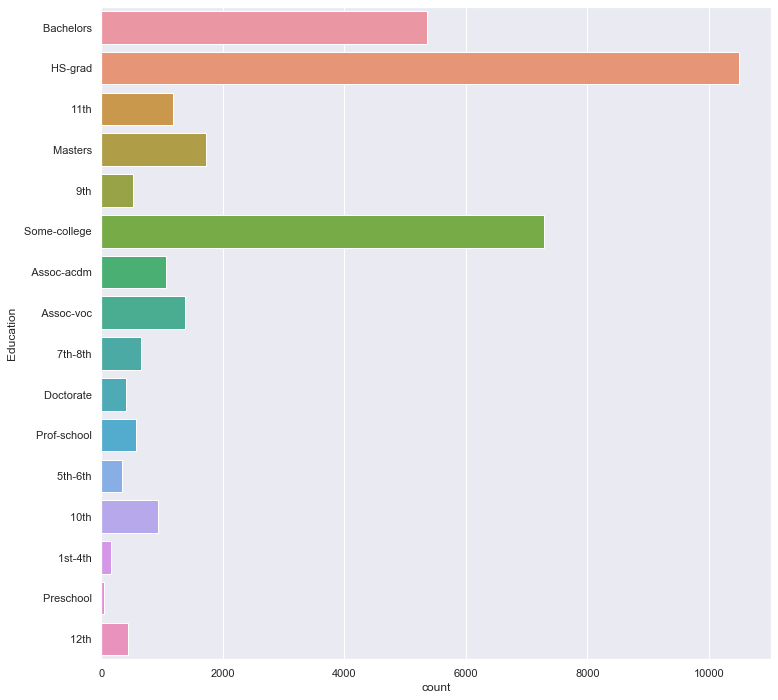

In [35]:
plt.figure(figsize=(12,12))
sns.countplot(y="Education",data=df)

Observations from the plot:

The education level of most of the Individuals is High School Graduates

It's good to know that very few Individuals have only been through Pre School

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

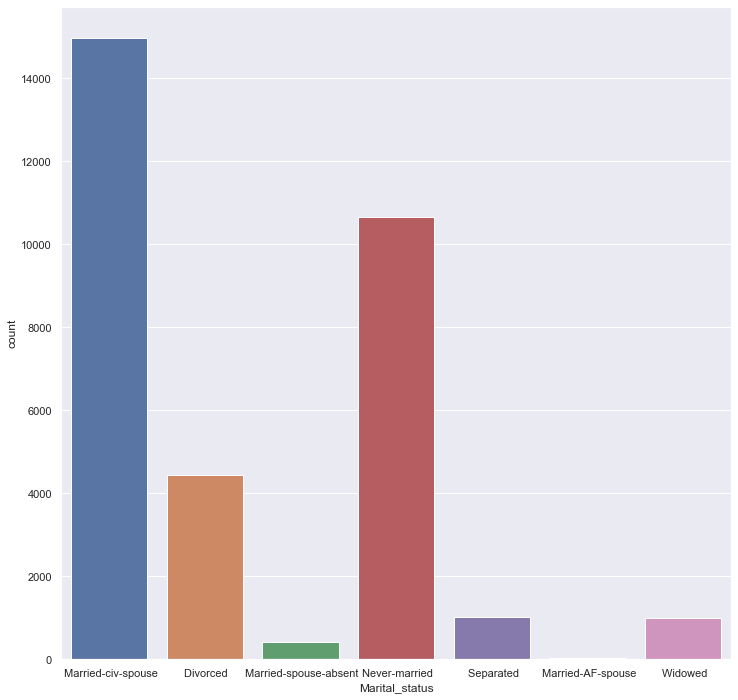

In [36]:
plt.figure(figsize=(12,12))
sns.countplot(x="Marital_status",data=df)

Observations from the plot:

Most of the individuals are Married

Very few individuals have there wife in Armed Force

<AxesSubplot:xlabel='count', ylabel='Occupation'>

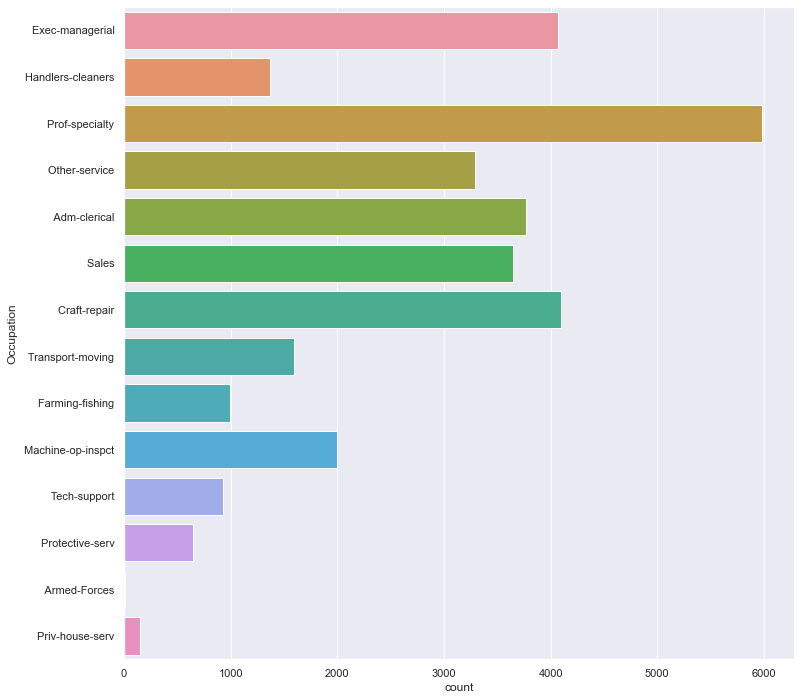

In [37]:
plt.figure(figsize=(12,12))
sns.countplot(y="Occupation",data=df)

Observations from the plot:

Most individuals are in the profession of prof specialty

least no individuals are employed in the Armed forces

<AxesSubplot:xlabel='Race', ylabel='count'>

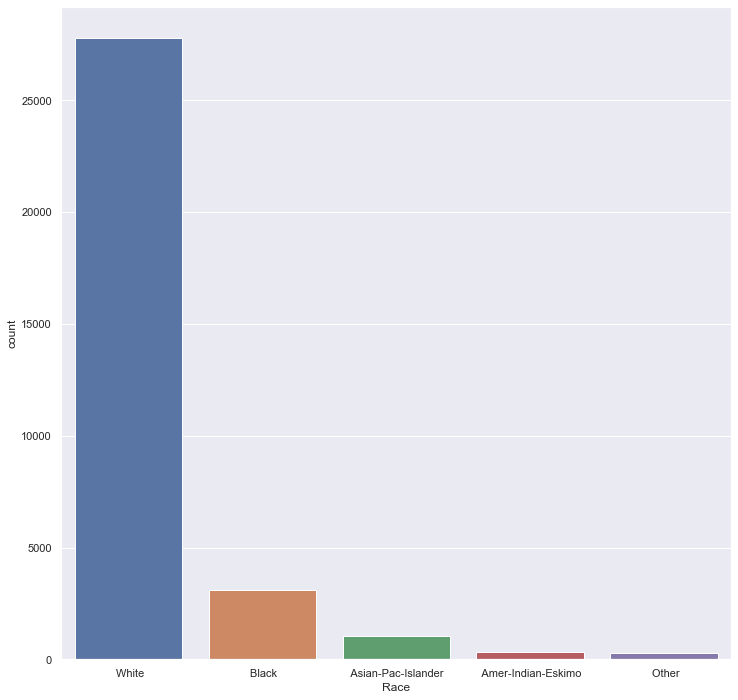

In [38]:
plt.figure(figsize=(12,12))
sns.countplot(x="Race",data=df)

Observations from the plot:

Most of the individuals belong to the (White Race)

 Male      21774
 Female    10762
Name: Sex, dtype: int64

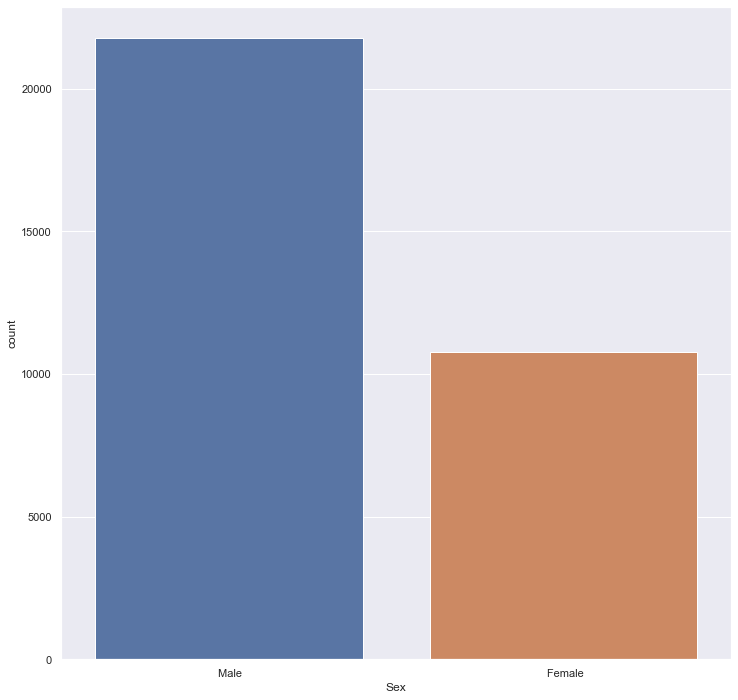

In [39]:
plt.figure(figsize=(12,12))
sns.countplot(x="Sex",data=df)
df["Sex"].value_counts()

Observations from the plot:

This dataset includes Over 21 thousand males

10 thousand females

<AxesSubplot:xlabel='count', ylabel='Native_country'>

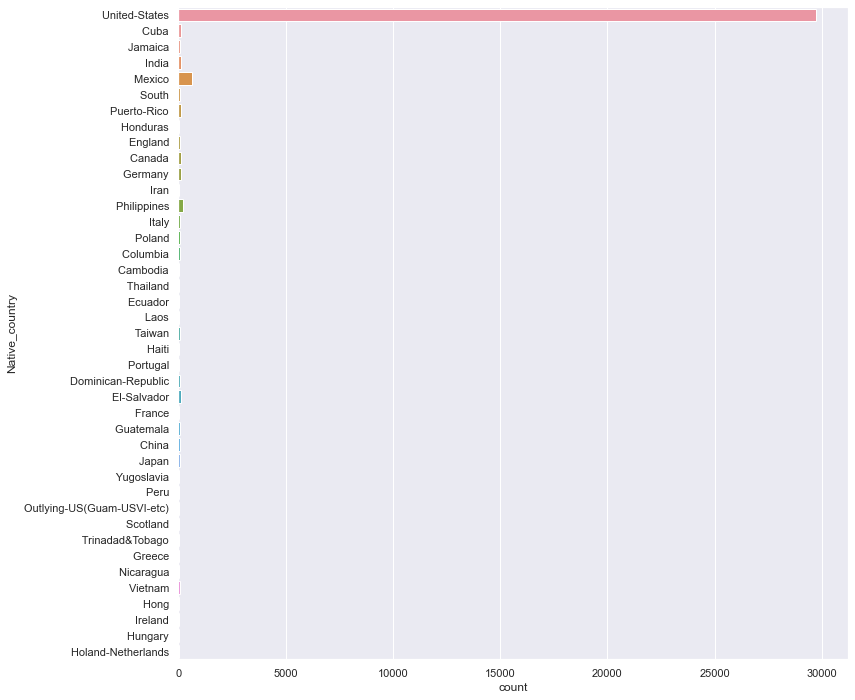

In [40]:
plt.figure(figsize=(12,12))
sns.countplot(y="Native_country",data=df)

Observations from the plot:

Most of the individuals were born in United states

<AxesSubplot:xlabel='Income', ylabel='count'>

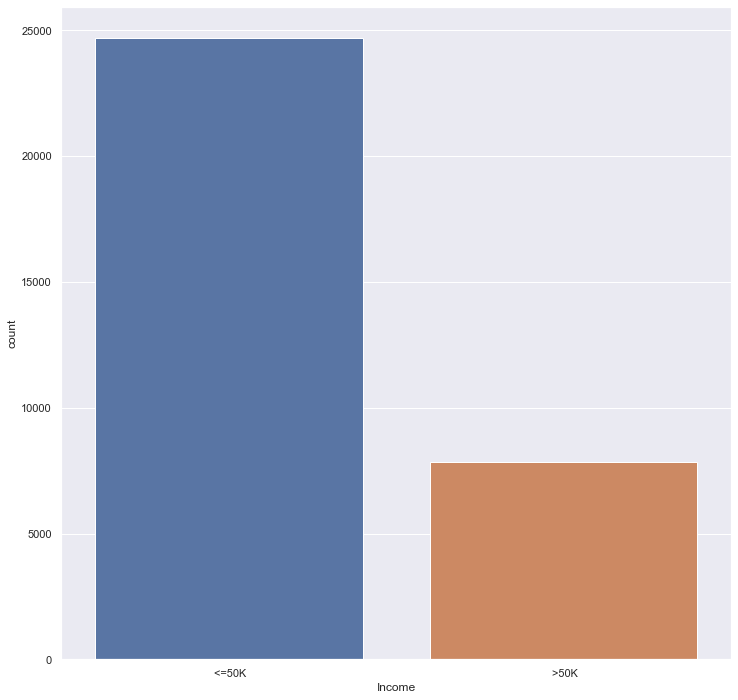

In [41]:
plt.figure(figsize=(12,12))
sns.countplot(x="Income",data=df)

Observations from the plot:

More Individuals are having there yearly income less than 50 K

<AxesSubplot:xlabel='Age', ylabel='Income'>

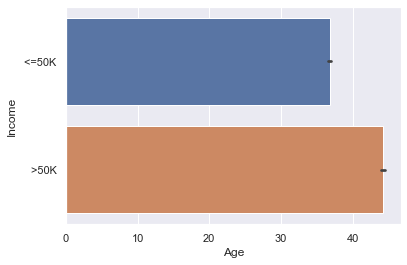

In [42]:
sns.barplot(x="Age",y="Income",data=df)

Observations from the plot:

We can clearly observe that after the age of 35 some of the people are earning more than 50 K (maybe because of more education and more experience or promotions)

Mostly all Young people will not start earning more than 50K from their first job 

<AxesSubplot:xlabel='count', ylabel='Education'>

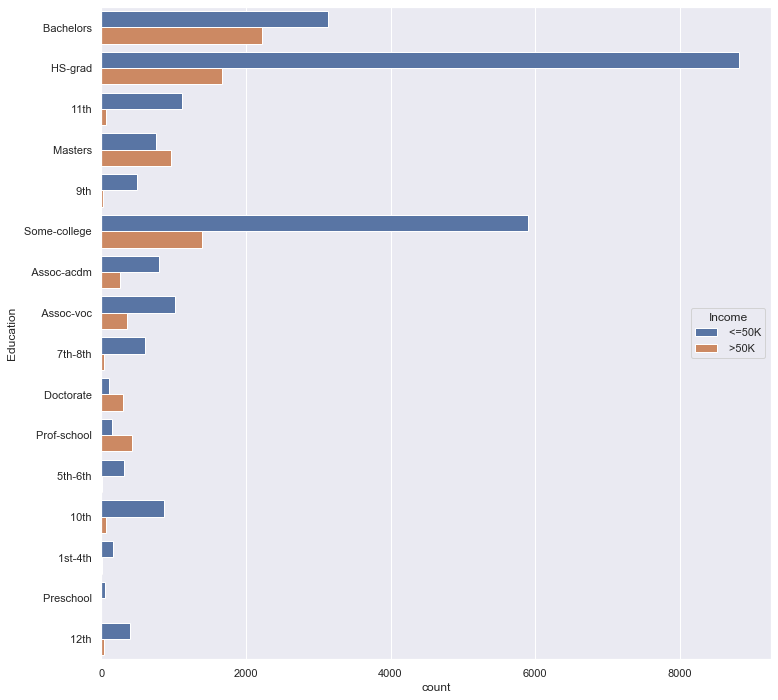

In [43]:
plt.figure(figsize=(12,12))
sns.countplot(y="Education",hue="Income",data=df,)

Observations from the plot:

Most of the Bachelors are having salary greater than 50K

Most of the high school graduates are having a salary of less than 50K

So we can say that more the education higher are the chances of getting more salary

<AxesSubplot:xlabel='count', ylabel='Workclass'>

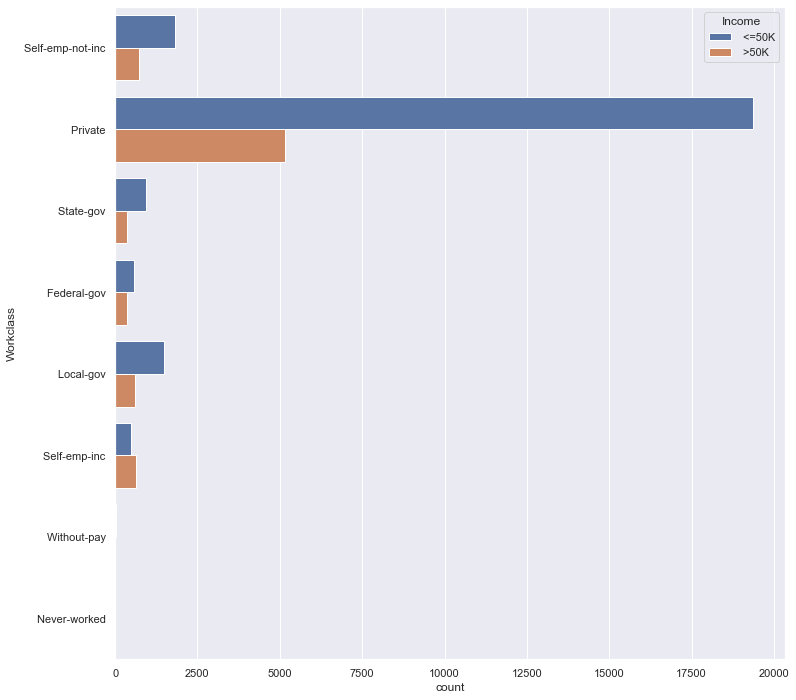

In [44]:
plt.figure(figsize=(12,12))
sns.countplot(y="Workclass",hue="Income",data=df,)

Observations from the plot:

If an individual works in a private sector higher are the chances that He/She will have a yearly income of more than 50K

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

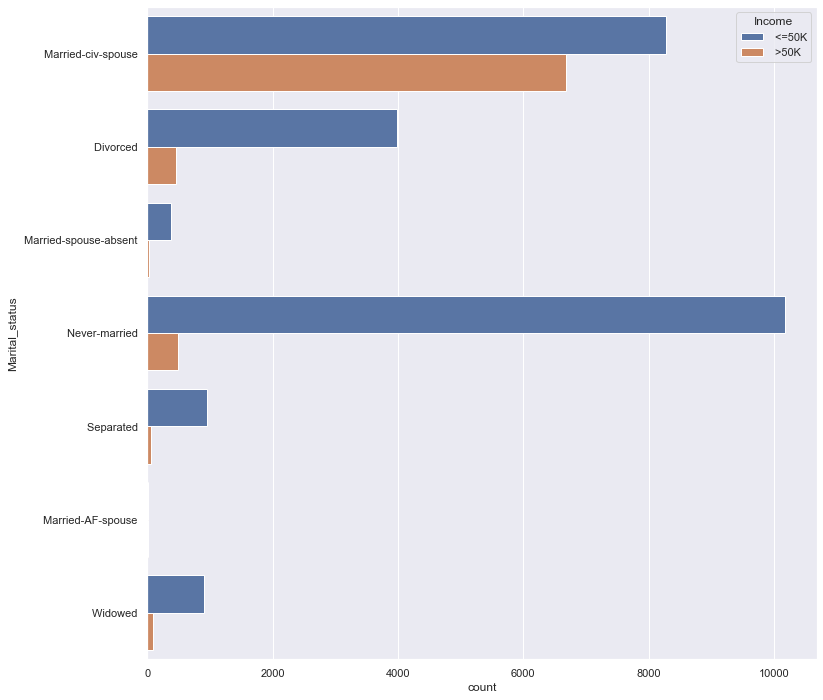

In [45]:
plt.figure(figsize=(12,12))
sns.countplot(y="Marital_status",hue="Income",data=df,)

Observations from the plot:

We can clearly observe that most of the individuals who are married with a spouse are having an income higher than 50K a year

Most Divorced individuals are having an income of less than 50K a year

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

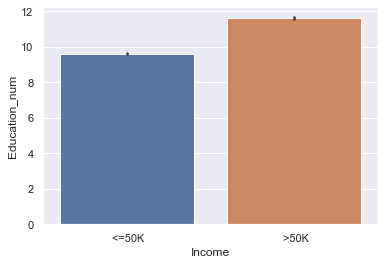

In [46]:
sns.barplot(y="Education_num",x="Income",data=df)

Observations from the plot:
    
There is a clear pattern more the education higher are the chances of get paid more than 50K a year

<AxesSubplot:xlabel='count', ylabel='Occupation'>

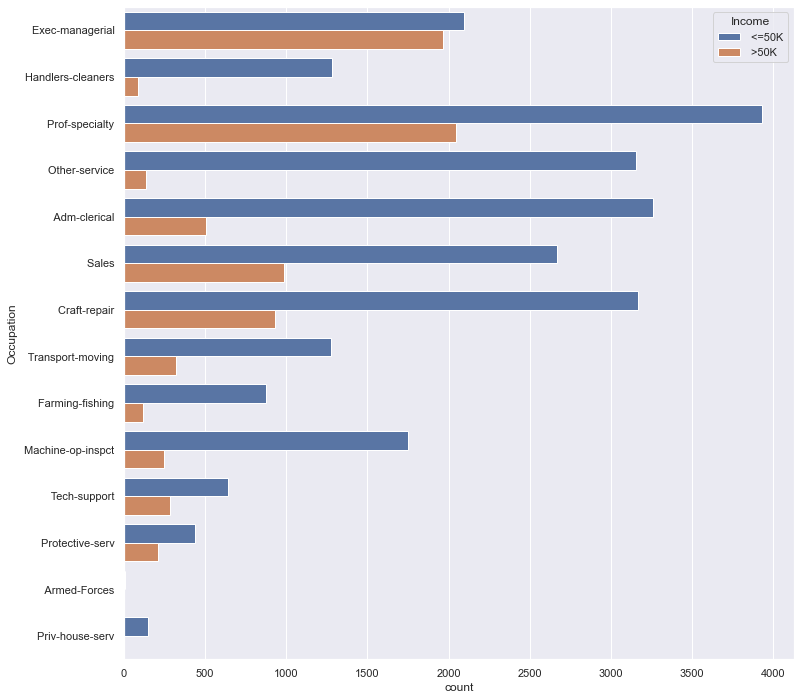

In [47]:
plt.figure(figsize=(12,12))
sns.countplot(y="Occupation",hue="Income",data=df,)

Observations from the plot:

We can say that if an individual is working in some kind of Executive Managerial position or prof specialty more are the chances for that individual to earn more than 50K a year

Framing and Fishing sector employees are mostly earning less than 50K a year

<AxesSubplot:xlabel='count', ylabel='Race'>

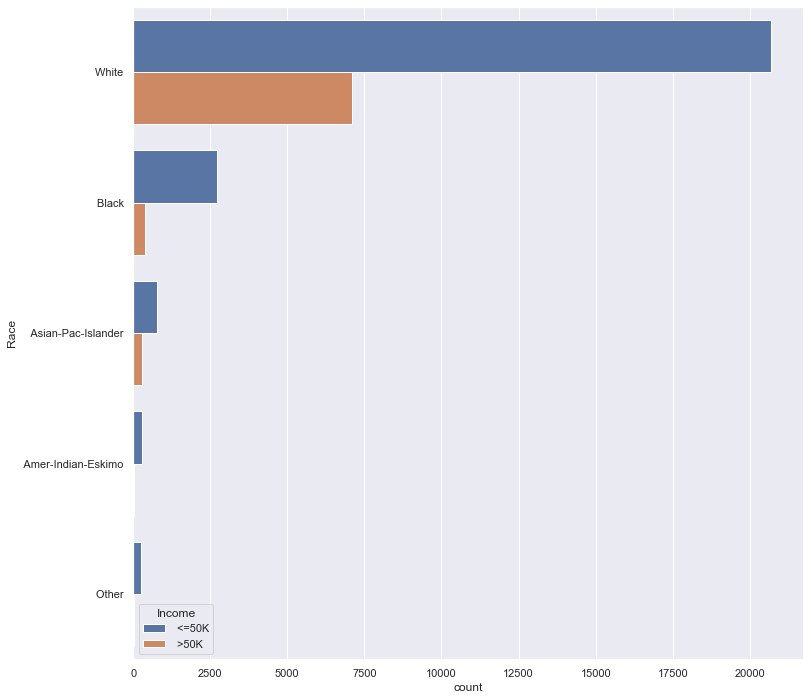

In [48]:
plt.figure(figsize=(12,12))
sns.countplot(y="Race",hue="Income",data=df,)

Observations from the plot:
    
As most of the people are Caucasian (Whites) higher are the chances that they will be earning more than 50K a year

Most of the individuals from other races are earning less than 50K a year

<AxesSubplot:xlabel='Sex', ylabel='count'>

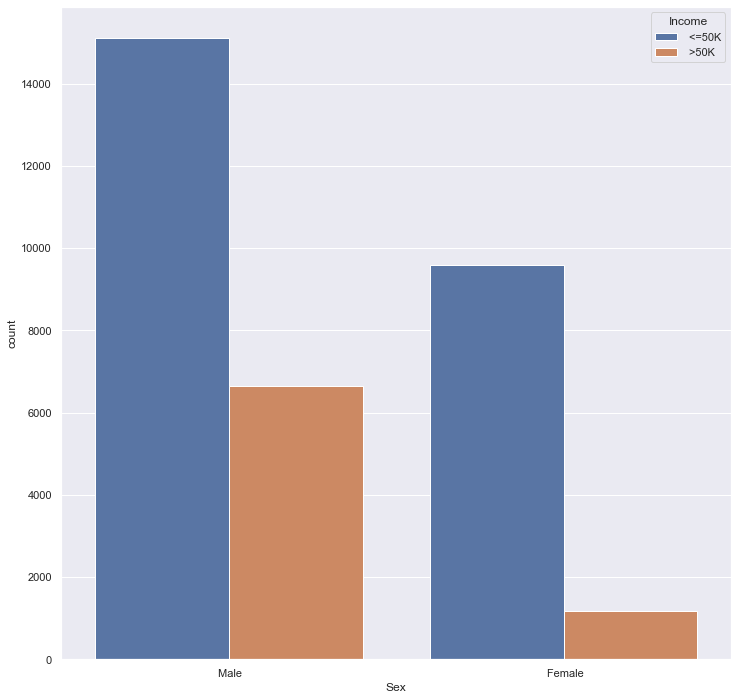

In [49]:
plt.figure(figsize=(12,12))
sns.countplot(x="Sex",hue="Income",data=df,)

Observations from the plot:

As the number of male individuals are twice as high as female individuals there is a higher chance that most of the males are having income of more than 50K a year

<AxesSubplot:xlabel='count', ylabel='Native_country'>

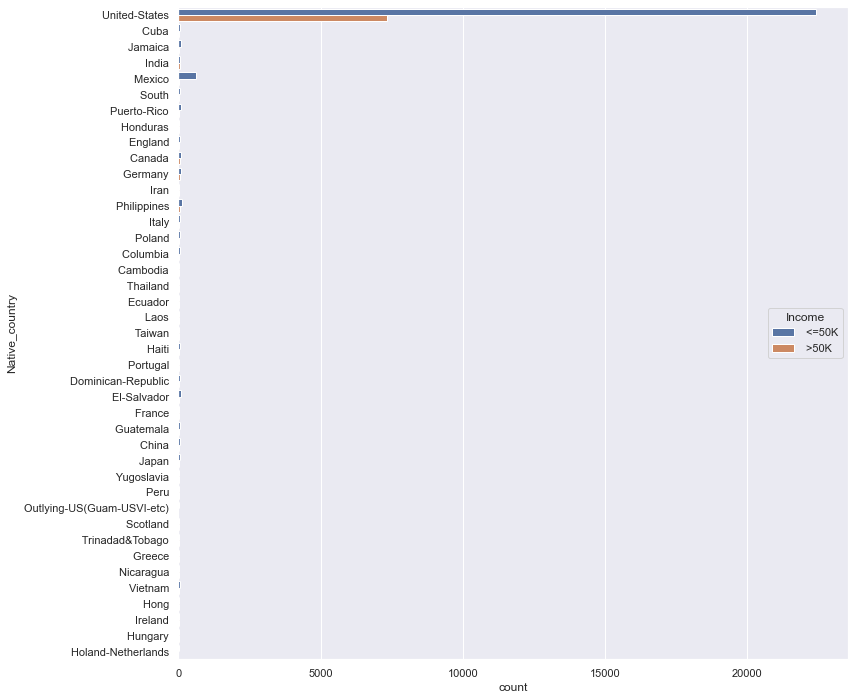

In [50]:
plt.figure(figsize=(12,12))
sns.countplot(y="Native_country",hue="Income",data=df,)

Observations from the plot:

Most of the native citizens are having an income of more than 50K a year

But the situation with the emigrates is pretty bad

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

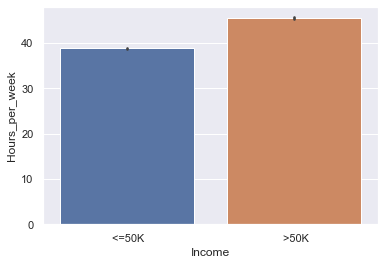

In [51]:
sns.barplot(y="Hours_per_week",x="Income",data=df,)

Observations from the plot:

Its normal to say that people who are working more Hours are payed more

### Data Cleaning

In [52]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Sprating continuous and categorical variables 

In [53]:
X_con = df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]

In [54]:
X_con.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [55]:
X_cat = df.drop(['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'],axis=1)

In [56]:
X_cat.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


<AxesSubplot:>

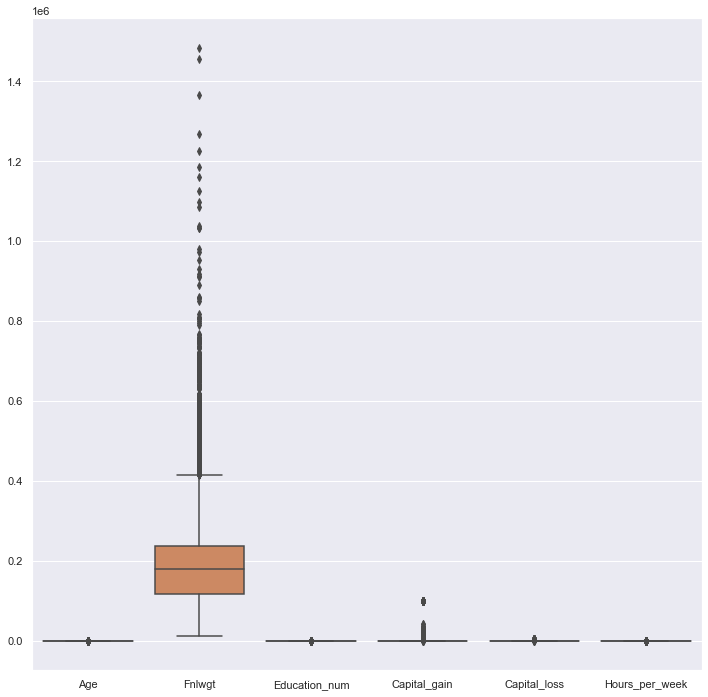

In [57]:
plt.figure(figsize=(12,12))
sns.boxplot(data=X_con)

### Checking outliers

In [58]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [59]:
outliers("Age")

The first quartile : 28.0 for Age
The third quartile : 48.0 for Age
The IQR : 20.0 for Age
The left outlier : -2.0 for Age
The Right outlier : 78.0 for Age
Left Outliers : 0
Right Outliers : 142


In [60]:
outliers("Fnlwgt")

The first quartile : 117831.5 for Fnlwgt
The third quartile : 236993.25 for Fnlwgt
The IQR : 119161.75 for Fnlwgt
The left outlier : -60911.125 for Fnlwgt
The Right outlier : 415735.875 for Fnlwgt
Left Outliers : 0
Right Outliers : 993


In [61]:
outliers("Education_num")

The first quartile : 9.0 for Education_num
The third quartile : 12.0 for Education_num
The IQR : 3.0 for Education_num
The left outlier : 4.5 for Education_num
The Right outlier : 16.5 for Education_num
Left Outliers : 1193
Right Outliers : 0


In [62]:
outliers("Capital_gain")

The first quartile : 0.0 for Capital_gain
The third quartile : 0.0 for Capital_gain
The IQR : 0.0 for Capital_gain
The left outlier : 0.0 for Capital_gain
The Right outlier : 0.0 for Capital_gain
Left Outliers : 0
Right Outliers : 2711


In [63]:
outliers("Capital_loss")

The first quartile : 0.0 for Capital_loss
The third quartile : 0.0 for Capital_loss
The IQR : 0.0 for Capital_loss
The left outlier : 0.0 for Capital_loss
The Right outlier : 0.0 for Capital_loss
Left Outliers : 0
Right Outliers : 1519


In [64]:
outliers("Hours_per_week")

The first quartile : 40.0 for Hours_per_week
The third quartile : 45.0 for Hours_per_week
The IQR : 5.0 for Hours_per_week
The left outlier : 32.5 for Hours_per_week
The Right outlier : 52.5 for Hours_per_week
Left Outliers : 5511
Right Outliers : 3491


In [65]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Removing Outliers

#### Z score technique

In [66]:
from scipy.stats import zscore

In [67]:
z = np.abs(zscore(X_con))

In [68]:
z.shape

(32536, 6)

In [69]:
threshhold = 3
print(np.where(z > 3))

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [70]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(32536, 15)
(29808, 15)


### Percentage data loss 

In [71]:
loss = (32536-29808)/32536*100

In [72]:
print("The data loss is ",round(loss,1)," %")

The data loss is  8.4  %


Considering the amount of outliers and size of the Data set we can go ahead with 8% loss of data

### Checking skewness in continuous variable

In [73]:
x_con = df_new[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]

In [74]:
x_con.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [75]:
x_cat = df_new.drop(['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'],axis=1)

In [76]:
x_cat.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


Taking skewness range between(-0.65 to +0.65)

In [77]:
x_con.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

High skewness in 

- Capital_gain

- Capital_loss

## Log Transform

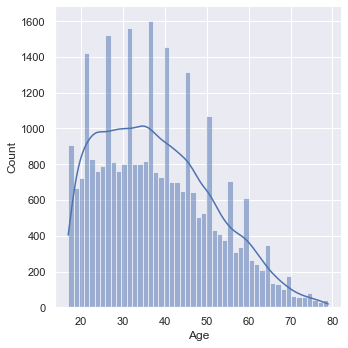

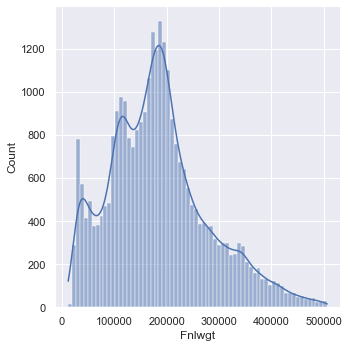

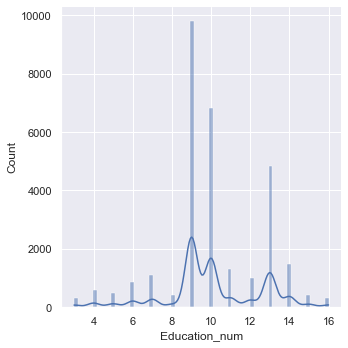

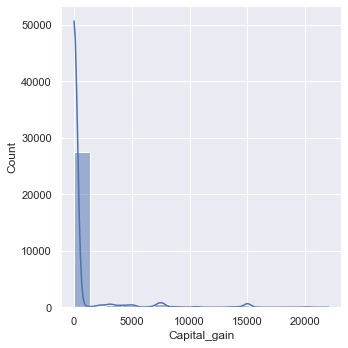

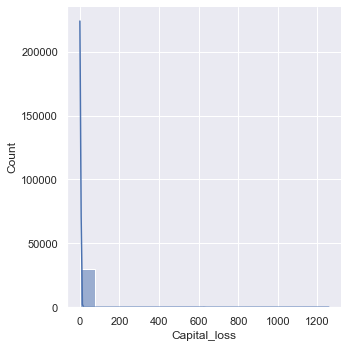

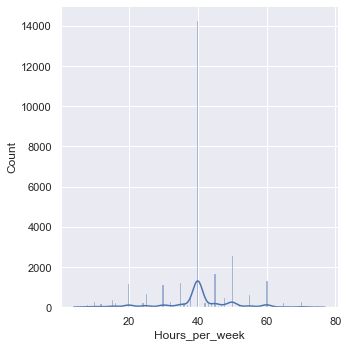

In [78]:
for i in x_con.columns:
    
    sns.displot(x_con[i],kde=True)

As shown in the graph, there seems skewness in 'capital-gain' and 'capital-loss' features

In [79]:
skew_feats = x_con.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
Capital_loss,29.651762
Capital_gain,4.941892
Fnlwgt,0.635160
Age,0.491125
Education_num,-0.169811
Hours_per_week,-0.353124


In [80]:
x_con["Capital_gain"] = np.log(x_con["Capital_gain"] + 1)

In [81]:
x_con["Capital_gain"].skew()

3.115925263042877

In [82]:
x_con["Capital_loss"] = np.log(x_con["Capital_loss"] + 1)

In [83]:
x_con["Capital_loss"].skew()

25.102454877775994

Some Skewness has been reduced

In [84]:
x_con.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0.0,0.0,13
1,38,215646,9,0.0,0.0,40
2,53,234721,7,0.0,0.0,40
3,28,338409,13,0.0,0.0,40
4,37,284582,14,0.0,0.0,40


Using one hot encoding on categorical variables

In [85]:
x_cat.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [86]:
x_cat['Income'] = [0 if x == " <=50K" else 1 for x in x_cat['Income']]

In [87]:
x_cat.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,0


In [88]:
x_cat['Income'].value_counts()

0    23156
1     6652
Name: Income, dtype: int64

In [89]:
x_cat = pd.get_dummies(data=x_cat,drop_first=True)

In [90]:
x_cat.head()

,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [91]:
x_cat.shape

(29808, 89)

In [92]:
df = pd.concat([x_con,x_cat],axis=1)

In [93]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0.0,0.0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0.0,0.0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [94]:
df.shape

(29808, 95)

# Train Test Split

In [95]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0.0,0.0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0.0,0.0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [96]:
X = df.drop("Income",axis=1)
y = df["Income"]

In [97]:
X.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0.0,0.0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0.0,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0.0,0.0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0.0,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0.0,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [98]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [99]:
X = X.values

In [100]:
X

array([[5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.30000e+01, 2.34721e+05, 7.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.80000e+01, 1.51910e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+01, 2.01490e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.20000e+01, 2.87927e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [101]:
y = y.values

In [102]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
X_train.shape

(22356, 94)

In [106]:
X_test.shape

(7452, 94)

## Scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
sc =MinMaxScaler()

In [109]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
X_train

array([[0.17741935, 0.23745576, 0.46153846, ..., 1.        , 0.        ,
        0.        ],
       [0.5483871 , 0.24854144, 0.46153846, ..., 1.        , 0.        ,
        0.        ],
       [0.40322581, 0.13171682, 0.53846154, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29032258, 0.91717309, 0.46153846, ..., 1.        , 0.        ,
        0.        ],
       [0.29032258, 0.21680822, 0.76923077, ..., 1.        , 0.        ,
        0.        ],
       [0.38709677, 0.25637912, 0.76923077, ..., 1.        , 0.        ,
        0.        ]])

In [111]:
X_test

array([[0.20967742, 0.31751631, 0.46153846, ..., 1.        , 0.        ,
        0.        ],
       [0.20967742, 0.30740604, 0.76923077, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.26628095, 0.15384615, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29032258, 0.10196074, 0.53846154, ..., 1.        , 0.        ,
        0.        ],
       [0.90322581, 0.27464884, 0.53846154, ..., 1.        , 0.        ,
        0.        ],
       [0.59677419, 0.43619663, 0.38461538, ..., 1.        , 0.        ,
        0.        ]])

### Machine Learning

### Logistic regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [114]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_1 = LogisticRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = accuracy_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.7772410091250671
for random state  0  The testing accuracy is : 0.775630703166935


for random state  1  The training accuracy is : 0.7755859724458758
for random state  1  The testing accuracy is : 0.7805958132045089


for random state  2  The training accuracy is : 0.775228126677402
for random state  2  The testing accuracy is : 0.7816693505099302


for random state  3  The training accuracy is : 0.7779119699409555
for random state  3  The testing accuracy is : 0.77361782071927


for random state  4  The training accuracy is : 0.7786276614779031
for random state  4  The testing accuracy is : 0.7714707461084273


for random state  5  The training accuracy is : 0.7670871354446234
for random state  5  The testing accuracy is : 0.7763016639828234


for random state  6  The training accuracy is : 0.7775093934514224
for random state  6  The testing accuracy is : 0.774825550187869


for random state  7  The training accuracy is : 0.7787618536

for random state  61  The training accuracy is : 0.7766595097512972
for random state  61  The testing accuracy is : 0.7773752012882448


for random state  62  The training accuracy is : 0.7775093934514224
for random state  62  The testing accuracy is : 0.774825550187869


for random state  63  The training accuracy is : 0.774825550187869
for random state  63  The testing accuracy is : 0.7828770799785293


for random state  64  The training accuracy is : 0.7771515476829487
for random state  64  The testing accuracy is : 0.7758990874932904


for random state  65  The training accuracy is : 0.7911075326534264
for random state  65  The testing accuracy is : 0.7960279119699409


for random state  66  The training accuracy is : 0.7766595097512972
for random state  66  The testing accuracy is : 0.7773752012882448


for random state  67  The training accuracy is : 0.7764805868670603
for random state  67  The testing accuracy is : 0.7779119699409555


for random state  68  The training accuracy

In [115]:
# Taking 25 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)


The training accuracy is : 0.791420647700841
The testing accuracy is : 0.7948201825013419


In [116]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[5596  246]
 [1283  327]]


              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5842
           1       0.57      0.20      0.30      1610

    accuracy                           0.79      7452
   macro avg       0.69      0.58      0.59      7452
weighted avg       0.76      0.79      0.75      7452





## Stratified Validation

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [118]:
kfold = StratifiedKFold(n_splits=10,random_state=35)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [119]:
kfold_accuracy_LR

0.7768384331189255

In [120]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [121]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.791421,0.79482,0.776838


## Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB

In [123]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_2 = GaussianNB() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = accuracy_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.8083288602612274
for random state  0  The testing accuracy is : 0.8095813204508857


for random state  1  The training accuracy is : 0.8076131687242798
for random state  1  The testing accuracy is : 0.8095813204508857


for random state  2  The training accuracy is : 0.8089103596349974
for random state  2  The testing accuracy is : 0.8081052066559313


for random state  3  The training accuracy is : 0.8087761674718197
for random state  3  The testing accuracy is : 0.8067632850241546


for random state  4  The training accuracy is : 0.808239398819109
for random state  4  The testing accuracy is : 0.8073000536768653


for random state  5  The training accuracy is : 0.80645016997674
for random state  5  The testing accuracy is : 0.8162909286097692


for random state  6  The training accuracy is : 0.8078815530506351
for random state  6  The testing accuracy is : 0.8109232420826624


for random state  7  The training accuracy is : 0.80967078

for random state  62  The training accuracy is : 0.809447128287708
for random state  62  The testing accuracy is : 0.8043478260869565


for random state  63  The training accuracy is : 0.8075237072821614
for random state  63  The testing accuracy is : 0.809447128287708


for random state  64  The training accuracy is : 0.8075237072821614
for random state  64  The testing accuracy is : 0.8091787439613527


for random state  65  The training accuracy is : 0.8075237072821614
for random state  65  The testing accuracy is : 0.8118625872249061


for random state  66  The training accuracy is : 0.809447128287708
for random state  66  The testing accuracy is : 0.8039452495974235


for random state  67  The training accuracy is : 0.8078815530506351
for random state  67  The testing accuracy is : 0.8091787439613527


for random state  68  The training accuracy is : 0.8076131687242798
for random state  68  The testing accuracy is : 0.8111916264090178


for random state  69  The training accuracy 

In [124]:
# Taking 1 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
mod_2 = GaussianNB() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = accuracy_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.8076131687242798
The testing accuracy is : 0.8095813204508857




In [125]:
print(confusion_matrix(y_test,pred_2))
print("\n")
print(classification_report(y_test,pred_2))
print("\n")

[[5674  143]
 [1276  359]]


              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5817
           1       0.72      0.22      0.34      1635

    accuracy                           0.81      7452
   macro avg       0.77      0.60      0.61      7452
weighted avg       0.79      0.81      0.77      7452





## Stratified Crossvalidation

In [126]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_NB = np.mean(abs(K_results))

In [127]:
kfold_accuracy_NB

0.8083401700704013

In [128]:
score = {"Algorithm":["Logistic Regression","Naive Bayes"],
         "Training_Acc":[train_score_1,train_score_2],
        "Accuracy":[test_score_1,test_score_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB]}

final_card = pd.DataFrame(score)

In [129]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.791421,0.794820,0.776838
1,Naive Bayes,0.807613,0.809581,0.808340


##  Random_forest_classification

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_3 = RandomForestClassifier() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = accuracy_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.9998658078368223
for random state  0  The testing accuracy is : 0.8487654320987654


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.8549382716049383


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.855072463768116


for random state  3  The training accuracy is : 0.9999552692789407
for random state  3  The testing accuracy is : 0.8503757380568975


for random state  4  The training accuracy is : 0.9998210771157631
for random state  4  The testing accuracy is : 0.8531937734836286


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.8538647342995169


for random state  6  The training accuracy is : 0.9999552692789407
for random state  6  The testing accuracy is : 0.8511808910359635


for random state  7  The training accuracy is : 0.9999552692789407
for random state  7  The testing a

for random state  62  The training accuracy is : 0.9999552692789407
for random state  62  The testing accuracy is : 0.8483628556092324


for random state  63  The training accuracy is : 0.9999105385578816
for random state  63  The testing accuracy is : 0.8479602791196994


for random state  64  The training accuracy is : 0.9999105385578816
for random state  64  The testing accuracy is : 0.8475577026301664


for random state  65  The training accuracy is : 0.9999105385578816
for random state  65  The testing accuracy is : 0.8459473966720343


for random state  66  The training accuracy is : 1.0
for random state  66  The testing accuracy is : 0.8455448201825013


for random state  67  The training accuracy is : 0.9999552692789407
for random state  67  The testing accuracy is : 0.8498389694041868


for random state  68  The training accuracy is : 0.9999552692789407
for random state  68  The testing accuracy is : 0.8491680085882984


for random state  69  The training accuracy is : 0.99995

In [132]:
# Taking the best random state as 65
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=65)
mod_3 = RandomForestClassifier() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("for random state ",i," The training accuracy is :",train_score_3)
print("for random state ",i," The testing accuracy is :",test_score_3)
print("\n")

for random state  100  The training accuracy is : 0.9999552692789407
for random state  100  The testing accuracy is : 0.8486312399355878




In [133]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[5378  445]
 [ 683  946]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5823
           1       0.68      0.58      0.63      1629

    accuracy                           0.85      7452
   macro avg       0.78      0.75      0.77      7452
weighted avg       0.84      0.85      0.84      7452





## Stratified Cross Validation

In [134]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [135]:
kfold_accuracy_RFR

0.8503759942724504

In [136]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "Accuracy":[test_score_1,test_score_2,test_score_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [137]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.791421,0.794820,0.776838
1,Naive Bayes,0.807613,0.809581,0.808340
2,Random Forest Classi,0.999955,0.848631,0.850376


##  Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_4 = DecisionTreeClassifier() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = accuracy_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.9999552692789407
for random state  0  The testing accuracy is : 0.8137412775093934


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.8106548577563071


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.8134728931830381


for random state  3  The training accuracy is : 0.9999552692789407
for random state  3  The testing accuracy is : 0.8122651637144391


for random state  4  The training accuracy is : 0.9999552692789407
for random state  4  The testing accuracy is : 0.8111916264090178


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.8183038110574342


for random state  6  The training accuracy is : 0.9999552692789407
for random state  6  The testing accuracy is : 0.8051529790660226


for random state  7  The training accuracy is : 0.9999552692789407
for random state  7  The testing 

for random state  64  The training accuracy is : 0.9999552692789407
for random state  64  The testing accuracy is : 0.8007246376811594


for random state  65  The training accuracy is : 0.9999552692789407
for random state  65  The testing accuracy is : 0.7949543746645196


for random state  66  The training accuracy is : 1.0
for random state  66  The testing accuracy is : 0.8111916264090178


for random state  67  The training accuracy is : 1.0
for random state  67  The testing accuracy is : 0.8087761674718197


for random state  68  The training accuracy is : 1.0
for random state  68  The testing accuracy is : 0.8064949006977993


for random state  69  The training accuracy is : 0.9999552692789407
for random state  69  The testing accuracy is : 0.8099838969404187


for random state  70  The training accuracy is : 0.9999552692789407
for random state  70  The testing accuracy is : 0.8083735909822867


for random state  71  The training accuracy is : 1.0
for random state  71  The testing

In [140]:
# Taking 5 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
mod_4 = DecisionTreeClassifier() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 1.0
The testing accuracy is : 0.8173644659151905




In [141]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[5146  691]
 [ 670  945]]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5837
           1       0.58      0.59      0.58      1615

    accuracy                           0.82      7452
   macro avg       0.73      0.73      0.73      7452
weighted avg       0.82      0.82      0.82      7452





## Stratified Cross Validation

In [142]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [143]:
kfold_accuracy_DT

0.8100177184810287

In [144]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [145]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.791421,0.794820,0.776838
1,Naive Bayes,0.807613,0.809581,0.808340
2,Random Forest Classi,0.999955,0.848631,0.850376
3,Decision Tree,1.000000,0.817364,0.810018


## AdaBoost

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [147]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_6 = AdaBoostClassifier() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = accuracy_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.8597691894793345
for random state  0  The testing accuracy is : 0.8592324208266238


for random state  1  The training accuracy is : 0.8584719985686169
for random state  1  The testing accuracy is : 0.8636607622114868


for random state  2  The training accuracy is : 0.8579799606369655
for random state  2  The testing accuracy is : 0.8643317230273752


for random state  3  The training accuracy is : 0.8586956521739131
for random state  3  The testing accuracy is : 0.8623188405797102


for random state  4  The training accuracy is : 0.8607532653426373
for random state  4  The testing accuracy is : 0.8572195383789587


for random state  5  The training accuracy is : 0.8597691894793345
for random state  5  The testing accuracy is : 0.8597691894793345


for random state  6  The training accuracy is : 0.8598586509214529
for random state  6  The testing accuracy is : 0.8576221148684917


for random state  7  The training accuracy is : 0.86097

for random state  60  The training accuracy is : 0.860887457505815
for random state  60  The testing accuracy is : 0.8577563070316694


for random state  61  The training accuracy is : 0.8608427267847558
for random state  61  The testing accuracy is : 0.8624530327428879


for random state  62  The training accuracy is : 0.8609769189479335
for random state  62  The testing accuracy is : 0.857487922705314


for random state  63  The training accuracy is : 0.8606190731794596
for random state  63  The testing accuracy is : 0.8609769189479335


for random state  64  The training accuracy is : 0.8597244587582752
for random state  64  The testing accuracy is : 0.856280193236715


for random state  65  The training accuracy is : 0.8606638039005189
for random state  65  The testing accuracy is : 0.8605743424584005


for random state  66  The training accuracy is : 0.861692610484881
for random state  66  The testing accuracy is : 0.8507783145464305


for random state  67  The training accuracy i

In [148]:
# Taking the best random state as 61
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=61)
mod_6 = AdaBoostClassifier() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.8608427267847558
The testing accuracy is : 0.8624530327428879




In [149]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[5480  313]
 [ 712  947]]


              precision    recall  f1-score   support

           0       0.89      0.95      0.91      5793
           1       0.75      0.57      0.65      1659

    accuracy                           0.86      7452
   macro avg       0.82      0.76      0.78      7452
weighted avg       0.86      0.86      0.86      7452





## Stratified Cross validation

In [150]:
kfold = StratifiedKFold(n_splits=10,random_state=33)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [151]:
kfold_accuracy_ADA

0.8601048362222488

In [152]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [153]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.791421,0.794820,0.776838
1,Naive Bayes,0.807613,0.809581,0.808340
2,Random Forest Classi,0.999955,0.848631,0.850376
3,Decision Tree,1.000000,0.817364,0.810018
4,ADA Boost,0.860843,0.862453,0.860105


## K Neighbor classifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_7 = KNeighborsClassifier() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = accuracy_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.8111916264090178
for random state  0  The testing accuracy is : 0.7474503488996243


for random state  1  The training accuracy is : 0.8157094292359993
for random state  1  The testing accuracy is : 0.7404723564143854


for random state  2  The training accuracy is : 0.8117731257827876
for random state  2  The testing accuracy is : 0.7475845410628019


for random state  3  The training accuracy is : 0.8156199677938808
for random state  3  The testing accuracy is : 0.7399355877616747


for random state  4  The training accuracy is : 0.8141885847199857
for random state  4  The testing accuracy is : 0.7442297369833601


for random state  5  The training accuracy is : 0.8141885847199857
for random state  5  The testing accuracy is : 0.7415458937198067


for random state  6  The training accuracy is : 0.8147253533726964
for random state  6  The testing accuracy is : 0.7408749329039184


for random state  7  The training accuracy is : 0.81696

for random state  61  The training accuracy is : 0.814635891930578
for random state  61  The testing accuracy is : 0.7419484702093397


for random state  62  The training accuracy is : 0.8135176239040973
for random state  62  The testing accuracy is : 0.7383252818035426


for random state  63  The training accuracy is : 0.8122651637144391
for random state  63  The testing accuracy is : 0.7443639291465378


for random state  64  The training accuracy is : 0.8125782787618536
for random state  64  The testing accuracy is : 0.7455716586151369


for random state  65  The training accuracy is : 0.8133387010198604
for random state  65  The testing accuracy is : 0.741009125067096


for random state  66  The training accuracy is : 0.8153515834675255
for random state  66  The testing accuracy is : 0.737385936661299


for random state  67  The training accuracy is : 0.813651816067275
for random state  67  The testing accuracy is : 0.7434245840042941


for random state  68  The training accuracy i

In [156]:
# Taking the best random state as 64
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)
mod_7 = KNeighborsClassifier() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.8125782787618536
The testing accuracy is : 0.7455716586151369




In [157]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[5287  495]
 [1401  269]]


              precision    recall  f1-score   support

           0       0.79      0.91      0.85      5782
           1       0.35      0.16      0.22      1670

    accuracy                           0.75      7452
   macro avg       0.57      0.54      0.53      7452
weighted avg       0.69      0.75      0.71      7452





## Stratified Cross Validation

In [158]:
kfold = StratifiedKFold(n_splits=10,random_state=11)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [159]:
kfold_accuracy_KNC

0.7446321557785437

In [160]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost","K Means"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA,kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [161]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.791421,0.794820,0.776838
1,Naive Bayes,0.807613,0.809581,0.808340
2,Random Forest Classi,0.999955,0.848631,0.850376
3,Decision Tree,1.000000,0.817364,0.810018
4,ADA Boost,0.860843,0.862453,0.860105
5,K Means,0.812578,0.745572,0.744632


## Gradient Boosting Classifier

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_8 = GradientBoostingClassifier() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = accuracy_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.8671944891751655
for random state  0  The testing accuracy is : 0.8654052603327965


for random state  1  The training accuracy is : 0.8661656825908034
for random state  1  The testing accuracy is : 0.8687600644122383


for random state  2  The training accuracy is : 0.8673734120594024
for random state  2  The testing accuracy is : 0.8666129898013956


for random state  3  The training accuracy is : 0.8655394524959742
for random state  3  The testing accuracy is : 0.8646001073537305


for random state  4  The training accuracy is : 0.8666129898013956
for random state  4  The testing accuracy is : 0.8643317230273752


for random state  5  The training accuracy is : 0.8667471819645732
for random state  5  The testing accuracy is : 0.8671497584541062


for random state  6  The training accuracy is : 0.8679996421542315
for random state  6  The testing accuracy is : 0.8625872249060654


for random state  7  The training accuracy is : 0.86688

for random state  60  The training accuracy is : 0.8659867597065665
for random state  60  The testing accuracy is : 0.8636607622114868


for random state  61  The training accuracy is : 0.8665682590803364
for random state  61  The testing accuracy is : 0.8659420289855072


for random state  62  The training accuracy is : 0.8674181427804616
for random state  62  The testing accuracy is : 0.8620504562533549


for random state  63  The training accuracy is : 0.8665682590803364
for random state  63  The testing accuracy is : 0.8613794954374665


for random state  64  The training accuracy is : 0.8682680264805869
for random state  64  The testing accuracy is : 0.8603059581320451


for random state  65  The training accuracy is : 0.8673286813383432
for random state  65  The testing accuracy is : 0.8613794954374665


for random state  66  The training accuracy is : 0.8695204866702452
for random state  66  The testing accuracy is : 0.8584272678475577


for random state  67  The training accura

In [164]:
# Taking 100 as the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
mod_8 = GradientBoostingClassifier() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.8662551440329218
The testing accuracy is : 0.8676865271068169




In [165]:
print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[5562  336]
 [ 650  904]]


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5898
           1       0.73      0.58      0.65      1554

    accuracy                           0.87      7452
   macro avg       0.81      0.76      0.78      7452
weighted avg       0.86      0.87      0.86      7452





## Stratified Cross Validation

In [166]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [167]:
kfold_accuracy_GB

0.8629226375546246

In [168]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost","K Means","Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7,
                        train_score_8],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7,
                   test_score_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA,kfold_accuracy_KNC,
                           kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [169]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.791421,0.794820,0.776838
1,Naive Bayes,0.807613,0.809581,0.808340
2,Random Forest Classi,0.999955,0.848631,0.850376
3,Decision Tree,1.000000,0.817364,0.810018
4,ADA Boost,0.860843,0.862453,0.860105
5,K Means,0.812578,0.745572,0.744632
6,Gredient Boosting,0.866255,0.867687,0.862923


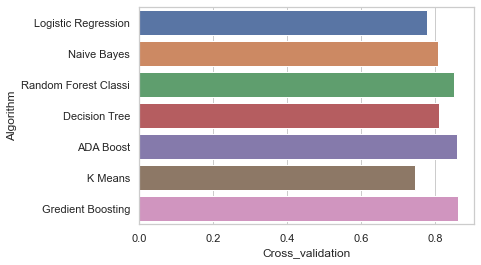

In [170]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### ADA Boost Classifier Has the best performance

In [174]:
col = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week','Workclass_ Local-gov',
       'Workclass_ Never-worked', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay', 'Education_ 11th',
       'Education_ 12th', 'Education_ 5th-6th', 'Education_ 7th-8th',
       'Education_ 9th', 'Education_ Assoc-acdm', 'Education_ Assoc-voc',
       'Education_ Bachelors', 'Education_ Doctorate', 'Education_ HS-grad',
       'Education_ Masters', 'Education_ Prof-school',
       'Education_ Some-college', 'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty',
       'Occupation_ Protective-serv', 'Occupation_ Sales',
       'Occupation_ Tech-support', 'Occupation_ Transport-moving',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Race_ Asian-Pac-Islander', 'Race_ Black',
       'Race_ Other', 'Race_ White', 'Sex_ Male', 'Native_country_ Canada',
       'Native_country_ China', 'Native_country_ Columbia',
       'Native_country_ Cuba', 'Native_country_ Dominican-Republic',
       'Native_country_ Ecuador', 'Native_country_ El-Salvador',
       'Native_country_ England', 'Native_country_ France',
       'Native_country_ Germany', 'Native_country_ Greece',
       'Native_country_ Guatemala', 'Native_country_ Haiti',
       'Native_country_ Honduras', 'Native_country_ Hong',
       'Native_country_ Hungary', 'Native_country_ India',
       'Native_country_ Iran', 'Native_country_ Ireland',
       'Native_country_ Italy', 'Native_country_ Jamaica',
       'Native_country_ Japan', 'Native_country_ Laos',
       'Native_country_ Mexico', 'Native_country_ Nicaragua',
       'Native_country_ Outlying-US(Guam-USVI-etc)', 'Native_country_ Peru',
       'Native_country_ Philippines', 'Native_country_ Poland',
       'Native_country_ Portugal', 'Native_country_ Puerto-Rico',
       'Native_country_ Scotland', 'Native_country_ South',
       'Native_country_ Taiwan', 'Native_country_ Thailand',
       'Native_country_ Trinadad&Tobago', 'Native_country_ United-States',
       'Native_country_ Vietnam', 'Native_country_ Yugoslavia']

<AxesSubplot:>

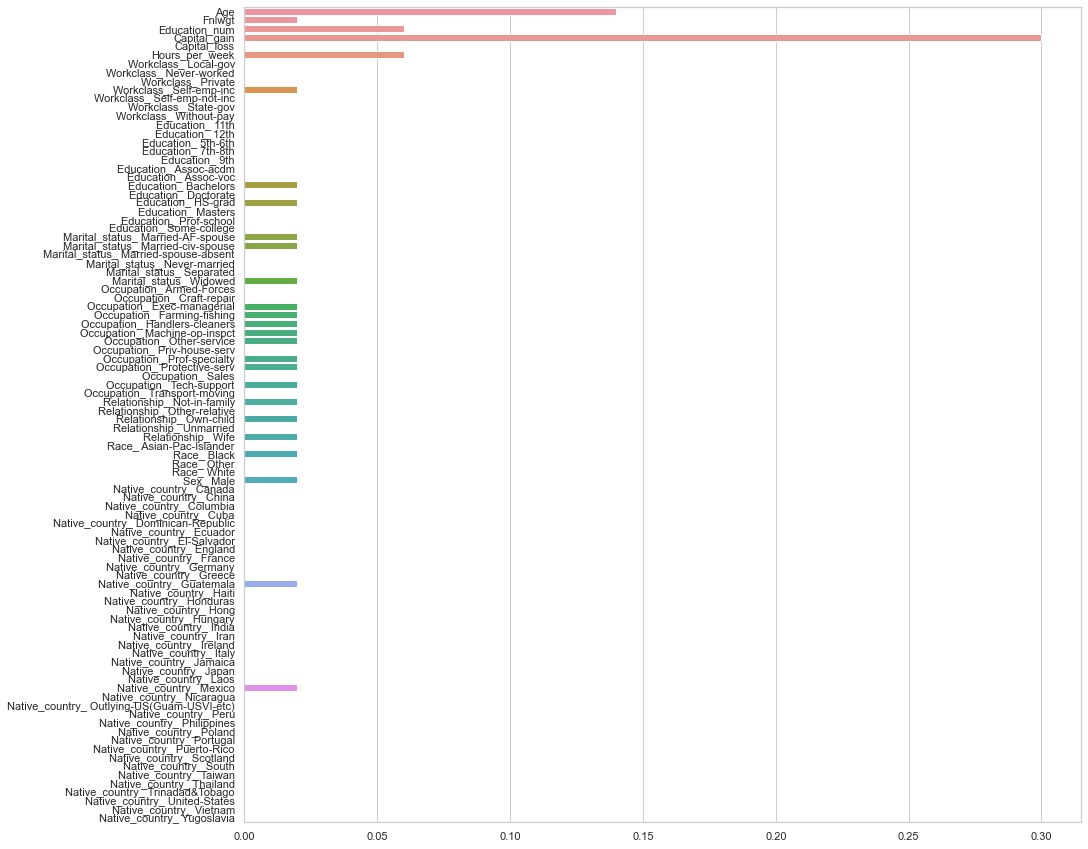

In [176]:
plt.figure(figsize=(15,15))
sns.barplot(y=col,x=mod_6.feature_importances_)

##### So we can clearly observe that  Education num and age  are turning out to be the most useful feature in predicting if  the person makes over 50K a year

### Hyperparametric Tuning

#### Grid Search Cv

In [172]:
from sklearn.model_selection import GridSearchCV

In [178]:
n_estimators=[50,100]

learning_rate=[0.01,0.05,0.1]

algorithm=["SAMME","SAMME.R"]

#### Parameters for ADA Boost

In [179]:
parameters = {
    "n_estimators":n_estimators,
    "learning_rate":learning_rate,
    "algorithm":algorithm
}

In [180]:
parameters

{'n_estimators': [50, 100],
 'learning_rate': [0.01, 0.05, 0.1],
 'algorithm': ['SAMME', 'SAMME.R']}

In [181]:
es = AdaBoostClassifier()

#### GRID SEARCH CV

In [182]:
grid_search=GridSearchCV(estimator=es,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

In [183]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   51.3s finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100]},
             verbose=2)

#### Best Estinators

In [184]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

#### Best Parameters

In [185]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

#### Best Score

In [186]:
grid_search.best_score_

0.8501520844516014

In [187]:
predictions = grid_search.predict(X_test)

#### Confusion Matrix

In [188]:
print(confusion_matrix(y_test,predictions))
print("\n")

[[5644  254]
 [ 763  791]]




#### Classification report

In [189]:
print(classification_report(y_test,predictions))
print("\n")

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5898
           1       0.76      0.51      0.61      1554

    accuracy                           0.86      7452
   macro avg       0.82      0.73      0.76      7452
weighted avg       0.86      0.86      0.85      7452





In [190]:
grid_search

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100]},
             verbose=2)

## ROC AUC CURVE

In [191]:
from sklearn.metrics import roc_curve,roc_auc_score

In [192]:
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

In [193]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [194]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99389624, 0.99745677,
       1.        ])

In [195]:
tpr

array([0.        , 0.00707851, 0.01930502, ..., 1.        , 1.        ,
       1.        ])

In [196]:
thresholds

array([1.6308836 , 0.6308836 , 0.62461939, ..., 0.32437246, 0.32285518,
       0.32119158])

Text(0.5, 1.0, 'ADA Boost Algorithm')

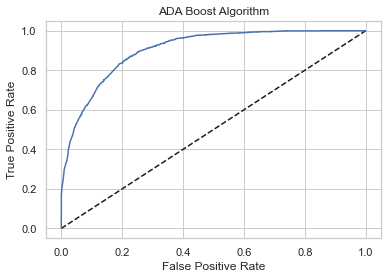

In [197]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="ADA Boost Classification")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADA Boost Algorithm')

#### The ROC AUC curve shows that our model is doing well

## Saving the model using Pickle

In [198]:
import pickle

In [199]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [200]:
with open("model_pickle","rb") as f:
    
    income = pickle.load(f)

### Conclusion

In [201]:
cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

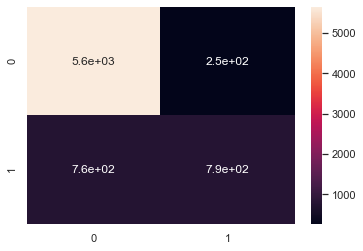

In [202]:
sns.heatmap(data=cm,annot=True)

In [203]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Most of the predictions are right

In [204]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0.0,0.0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0.0,0.0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0.0,0.0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [205]:
# The model needs to predict 0 i.e the income is less than 50K
# for this inputs
df.iloc[0,0:].values

array([5.0000e+01, 8.3311e+04, 1.3000e+01, 0.0000e+00, 0.0000e+00,
       1.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [206]:
income.predict(sc.transform([[5.0000e+01, 8.3311e+04, 1.3000e+01, 0.0000e+00, 0.0000e+00,
       1.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]]))

array([0], dtype=int64)

### The model is predicting right value